In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score

## 1.- Análisis de datos

In [2]:
df = pd.read_csv('../datasets/combined_data.csv')

dataset sacado de: https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification

In [3]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df.isnull().sum() 

label    0
text     0
dtype: int64

In [6]:
df['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

<Axes: xlabel='label'>

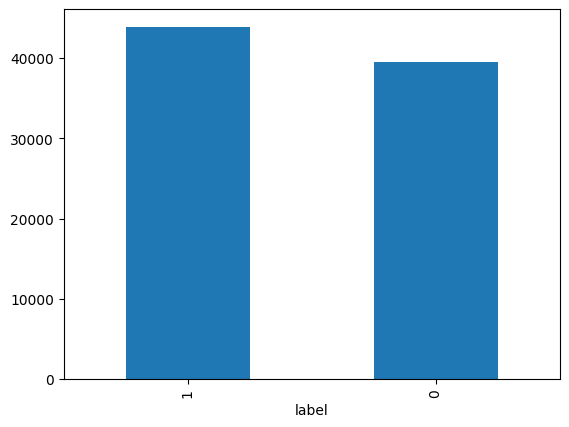

In [7]:
df['label'].value_counts().plot.bar()

## 2.- Preprocesamiento

In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  

max_words = 7  

def process_text(text):
    tokens = word_tokenize(text) 
    tokens = [token.lower() for token in tokens if token.isalnum()] 
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]  
    return tokens[:max_words]  


In [9]:
# Aplicar la función a cada fila de la columna 'text'
df['processed_text'] = df['text'].apply(process_text)

In [10]:
df.head()

,label,text,processed_text
0,1,ounce feather bowl hummingbird opec moment ala...,"[ounce, feather, bowl, hummingbird, opec, mome..."
1,1,wulvob get your medircations online qnb ikud v...,"[wulvob, get, medircations, online, qnb, ikud,..."
2,0,computer connection from cnn com wednesday es...,"[computer, connection, cnn, com, wednesday, es..."
3,1,university degree obtain a prosperous future m...,"[university, degree, obtain, prosperous, futur..."
4,0,thanks for all your answers guys i know i shou...,"[thanks, answer, guy, know, checked, rsync, ma..."


In [11]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['processed_text'].apply(lambda x: ' '.join(x)))

In [12]:
y = df['label']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 3.- Entrenamiento

In [14]:
nb_multinomial = MultinomialNB()

nb_multinomial.fit(x_train, y_train)

MultinomialNB()

In [15]:
y_pred= nb_multinomial.predict(x_test)

In [16]:
f1_score(y_test, y_pred)

0.9334572058994309

<Axes: >

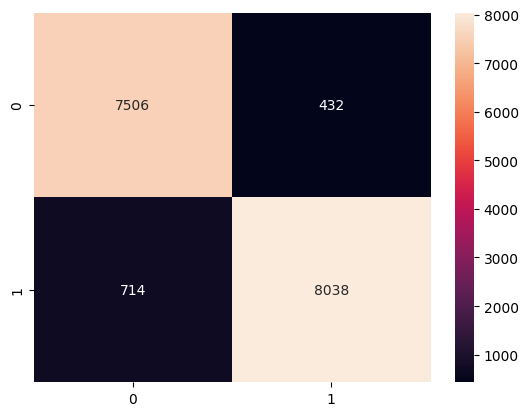

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')